In [42]:
library("e1071")
library("randomForest")


In [43]:
credito <- read.csv(
    "../data/Credit.csv",
    sep = ",",
    na.strings = "",
    stringsAsFactors = TRUE
)

credito$class <- as.factor(credito$class)

dim(credito)
head(credito, 10)


[1] 1000   21

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
7,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,⋯,'life insurance',53,none,own,1,skilled,1,none,yes,good
8,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,⋯,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
9,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,⋯,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good


In [44]:
# set.seed(234)
amostra <- sample(2, nrow(credito), replace = TRUE, prob = c(0.7, 0.3))
credito_treino <- credito[amostra == 1, ]
credito_teste <- credito[amostra == 2, ]


In [45]:
modelo <- svm(class ~ ., data = credito_treino)
predicao <- predict(modelo, credito_teste)


In [46]:
confusao <- table(credito_teste$class, predicao)
confusao


      predicao
       bad good
  bad   25   70
  good  10  194

In [47]:
taxa_acerto <- sum(diag(confusao)) / sum(confusao)
taxa_acerto


[1] 0.7324415

In [48]:
taxa_erro <- 1 - taxa_acerto
taxa_erro


[1] 0.2675585

In [49]:
importancia <- randomForest(class ~ ., data = credito_treino)
importancia



Call:
 randomForest(formula = class ~ ., data = credito_treino) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 22.97%
Confusion matrix:
     bad good class.error
bad   80  125  0.60975610
good  36  460  0.07258065

In [50]:
col <- importance(importancia)
col


,MeanDecreaseGini
checking_status,34.544106
duration,25.606836
credit_history,17.688279
purpose,24.717338
credit_amount,34.078014
savings_status,15.221878
employment,17.440441
installment_commitment,12.086266
personal_status,11.421633
other_parties,6.465274


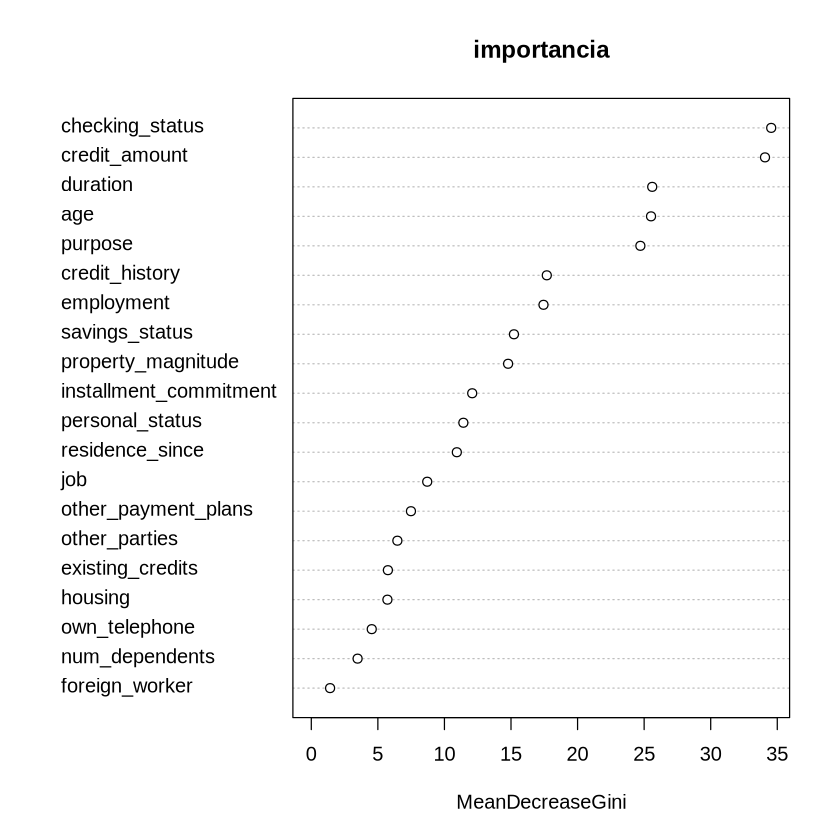

In [51]:
varImpPlot(importancia)


In [52]:
modelo <- svm(class ~ credit_amount + age + duration + checking_status, credito_treino)
predicao <- predict(modelo, credito_teste)
confusao <- table(credito_teste$class, predicao)
confusao


      predicao
       bad good
  bad   26   69
  good  12  192

In [53]:
taxa_acerto <- sum(diag(confusao)) / sum(confusao)
taxa_acerto


[1] 0.729097

In [54]:
taxa_erro <- 1 - taxa_acerto
taxa_erro


[1] 0.270903